# Import Some Useful Iibraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read Data From the Directory

In [9]:
Data=pd.read_csv("/Users/chohan/Desktop/ML Problem/Datasets/iris.csv",delimiter=',')

In [69]:
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Change Data into Feature and Targets

In [81]:
X=Data.iloc[:, [0, 1, 2,3]].values

# Elbow Method to find No of Cluster are required

In [83]:
#Check the Elbow 
wcss=[]
for i in range(1,11):
    kmeans_clusters=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans_clusters.fit(X)
    wcss.append(kmeans_clusters.inertia_)

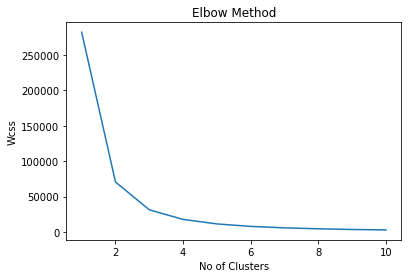

In [87]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("Wcss")
plt.show()

# Apply Kmeans Clustering 

In [97]:
#Kmean_Clustering
kmeans_clusters=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans_clusters.fit_predict(X)


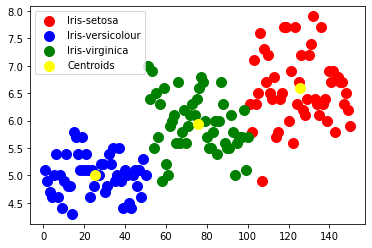

In [98]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans_clusters.cluster_centers_[:, 0], kmeans_clusters.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()